# Local seismic attributes

### Sergey Fomel
### published in Geophysics, 72, A29-A33, (2007)

Local seismic attributes measure seismic signal characteristics not instantaneously at each signal point and not globally across a data window but locally in the neighborhood of each point. I define local attributes with the help of regularized inversion and demonstrate their usefulness for measuring local frequencies of seismic signals and local similarity between different datasets. I use shaping regularization for controlling the locality and smoothness of local attributes. A multicomponent image registration example from a nine-component land survey illustrates practical applications of local attributes for measuring differences between registered images.

## Introduction

*Seismic attribute* is defined by Sheriff (1991) as a “measurement derived from seismic data”. Such a broad definition allows for many uses and abuses of the term. Countless attributes have been introduced in the practice of seismic exploration (Brown, 1996; Chen and Sidney, 1997), which led Eastwood (2002) to talk about “attribute explosion”. Many of these attributes play an exceptionally important role in interpreting and analyzing seismic data (Chopra and Marfurt, 2005).

In this paper, I consider particular attribute applications:

1.  *Measuring local frequency content in a seismic image* is important
    both for studying the phenomenon of seismic wave attenuation and for
    processing of attenuated signals.

2.  *Measuring local similarity between two seismic images* is useful
    for seismic monitoring, registration of multicomponent data, and
    analysis of velocities and amplitudes.

Some of the best known seismic attributes are instantaneous attributes
such as instantaneous phase or instantaneous dip (Taner et al., 1979; Barnes, 1992, 1993). Such attributes measure seismic frequency characteristics as being attached instantaneously to each signal point. This measure is notoriously noisy and may lead to unphysical values such as negative frequencies (White, 1991).

In this paper, I introduce a concept of *local attributes*. Local
attributes measure signal characteristics not instantaneously at each
data point but in a local neighborhood around the point. According to
the Fourier uncertainty principle, frequency is essentially an uncertain
characteristic when applied to a local region in the time domain.
Therefore, local frequency is more physically meaningful than
instantaneous frequency. The idea of locality extends from local
frequency to other attributes, such as the correlation coefficient
between two different datasets, that are conventionally evaluated in
sliding windows.

The paper starts with reviewing the definition of instantaneous
frequency. I modify this definition to that of local frequency by
recognizing it as a form of regularized inversion and by changing
regularization to constrain the continuity and smoothness of the output.
The same idea is extended next to define local correlation . I
illustrate a practical application of local attributes using an example
from multicomponent seismic image registration in a nine-component land
survey.

## Measuring local frequencies

### Definition of instantaneous frequency

Let $f(t)$ represent seismic trace as a function of time $t$. The
corresponding complex trace $c(t)$ is defined as
\begin{equation}
c(t) = f(t) + i\,h(t)\;,
  \label{eq:complex}
\end{equation}  
where $h(t)$ is the Hilbert transform of the real
trace $f(t)$. One can also represent the complex trace in terms of the
envelope $A(t)$ and the instantaneous phase $\phi(t)$, as follows:
\begin{equation}
\label{eq:polar}
  c(t) = A(t)\,e^{i\,\phi(t)}\;.
\end{equation}
By definition, instantaneous
frequency is the time derivative of the instantaneous phase (Taner et al., 1979)
\begin{equation}
\label{eq:instant}
  \omega(t) = \phi'(t) = \mathit{Im}\left[\frac{c'(t)}{c(t)}\right]
  = \frac{f(t)\,h'(t) - f'(t)\,h(t)}{f^2(t) + h^2(t)}\;.
\end{equation}  
Different numerical realizations of equation <a href="#eq:instant" data-reference-type="ref" data-reference="eq:instant">3</a>
produce slightly different algorithms (Barnes, 1992).

Note that the definition of instantaneous frequency calls for division
of two signals. In a linear algebra notation, 
\begin{equation}
\label{eq:vecif}
  \mathbf{w} = \mathbf{D}^{-1}\,\mathbf{n}\;,
\end{equation}    
where $\mathbf{w}$ represents the vector of instantaneous frequencies $\omega(t)$, $\mathbf{n}$ represents the numerator in
equation <a href="#eq:instant" data-reference-type="ref" data-reference="eq:instant">3</a>,
and $\mathbf{D}$ is a diagonal operator made from the denominator of
equation <a href="#eq:instant" data-reference-type="ref" data-reference="eq:instant">3</a>.
A recipe for avoiding division by zero is adding a small
constant $\epsilon$ to the denominator (Matheney and Nowack, 1995). Consequently, equation <a href="#eq:vecif" data-reference-type="ref" data-reference="eq:vecif">4</a>
transforms to 
\begin{equation}
\label{eq:vecife}
  \mathbf{w}_{inst} = \left(\mathbf{D}+\epsilon\,\mathbf{I}\right)^{-1}\,\mathbf{n}\;,
\end{equation}  
where $\mathbf{I}$ stands for the identity operator. Stabilization by
$\epsilon$ does not, however, prevent instantaneous frequency from being
a noisy and unstable attribute.

In [3]:
from m8r import view

In [9]:
%%file sign.scons

import math

# CHIRP SIGNAL
###############

Flow('chirp', None,
     'math  n1=1024 d1=0.004 output="cos(%g*x1*(1+0.5*x1))" ' % (math.pi*10))
Flow('chirp2', None,
     '''
     math  n1=1424 d1=0.004 o1=-0.8 output="cos(%g*x1*(1+0.5*x1))"
     ''' % (math.pi*10))

Plot('chirp',
     '''
     graph title="(a) Chirp Signal" label1="Time (s)" label2=Amplitude
     labelsz=10 titlesz=12
     ''')

# SYNTHETIC SIGNAL
###################

Fetch('ai1.rsf', 'attr')

Flow('ai', 'ai1.rsf', 'dd form=native')

Flow('refl', 'ai1', 'ai2refl')
Flow('ricker', None, 'spike n1=250 d1=1e-04 k1=125 | ricker1')
Flow('conv', 'refl', 'ricker1')

plots = {'ai1': 'Acoustic Impedance',
         'refl': 'Reflectivity',
         'ricker': 'Wavelet',
         'conv': '(b) Synthetic Trace'}

for plot in plots.keys():
    Plot(plot,
         '''
         graph title="%s" label1=Time unit1=s label2=Amplitude
         labelsz=10 titlesz=12
         ''' % plots[plot])
    Plot('spec'+plot, plot,
         '''
         spectra |
         graph title="%s Spectrum" wantaxis1=n
         labelsz=10 titlesz=12
         ''' % plots[plot])

# REAL SIGNAL
##############

Fetch('pptrace.rsf', 'attr')
Flow('pptrace1', 'pptrace.rsf', 'dd form=native | window max1=5')

Plot('seis', 'pptrace1',
     '''
     graph title="(c) Seismic Trace" label1="Time (s)" label2=Amplitude
     labelsz=10 titlesz=12 
     ''')

# COLLECTING TOGETHER
######################

Result('sign', 'chirp conv seis', 'OverUnderAniso', vppen='txscale=1.2')

Overwriting sign.scons


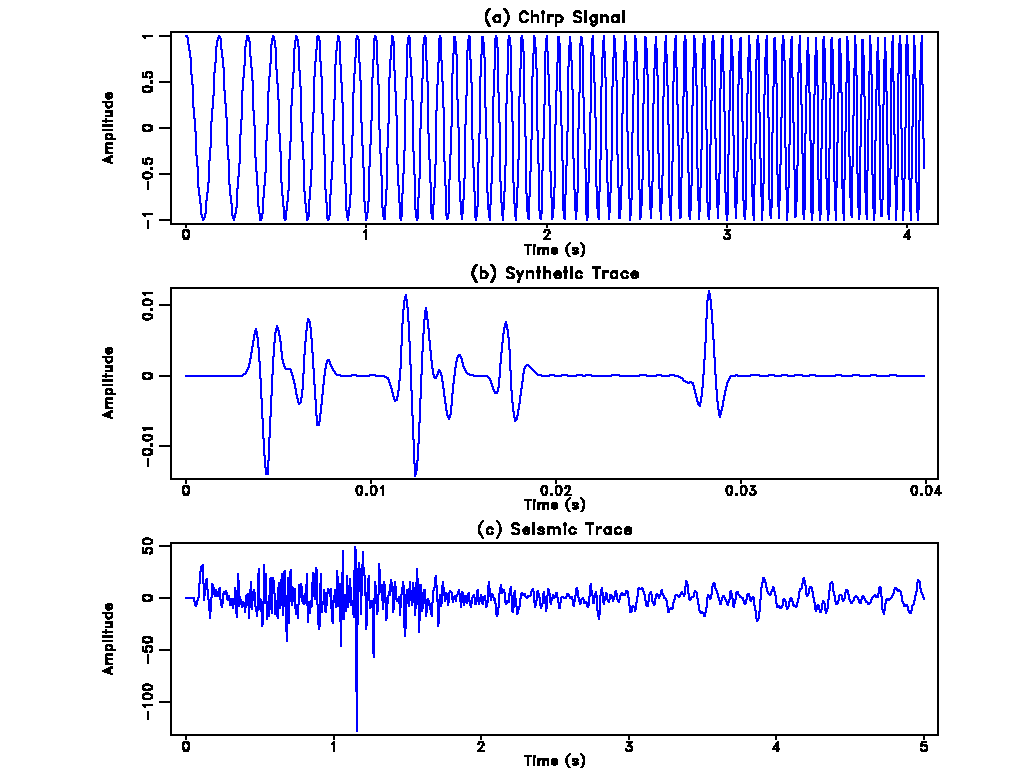

In [10]:
view('sign')

<p id="fig:sign" style="color:navy">Figure 1: Test signals for comparing frequency attributes. a: Synthetic chirp signal with linear frequency change, b: Synthetic seismic trace from convolution of a synthetic reflectivity with a Ricker wavelet, c: real seismic trace from a marine survey.</p>

In [13]:
%%file inst.scons

for case in (1, 2):
    ic = 'ic%d' % case
    Plot(ic, 'chirp2',
         '''     
         iphase order=200 rect1=%d hertz=y |
         window min1=0 n1=1024 |
         graph title="(a) Chirp %s Frequency" min2=0 max2=30 plotcol=5
         label1="Time (s)" label2="Frequency (Hz)"
         labelsz=10 titlesz=12
         ''' % ((1, "Instantaneous"), (10, "Local"))[case-1])
    Result(ic, ['chirp', ic], 'OverUnderAniso')

for case in (1, 2):
    sf = 'sf%d' % case
    Flow(sf, 'conv',
         '''
         iphase order=10 rect1=%d hertz=y complex=%d
         ''' % ((1, 500)[case-1], case-1))
    Plot(sf,
         '''
         scale dscale=0.05 |
         graph title="(b) Synthetic %s Frequency"
         label1=Time unit1=s min2=-5 max2=100
         label2="Frequency (Hz)" plotcol=5
         labelsz=10 titlesz=12
         ''' % ('Instantaneous', 'Local')[case-1])
    Result(sf, ['conv', sf], 'OverUnderAniso')

for case in (1, 2):
    seis = 'seis%d' % case
    Plot(seis, 'pptrace1',
         '''
         iphase rect1=%d order=10 hertz=y complex=%d |
         graph title="(c) Seismic %s Frequency"
         min2=-20 max2=100 plotcol=5
         label1="Time (s)" label2="Frequency (Hz)"
         labelsz=10 titlesz=12
         ''' % ((1, 0, "Instantaneous"), (60, 1, "Local"))[case-1])
    Result(seis, ['seis', seis], 'OverUnderAniso')

Result('inst', 'ic1 sf1 seis1', 'OverUnderAniso', vppen='txscale=1.2')
Result('locl', 'ic2 sf2 seis2', 'OverUnderAniso', vppen='txscale=1.2')

Overwriting inst.scons


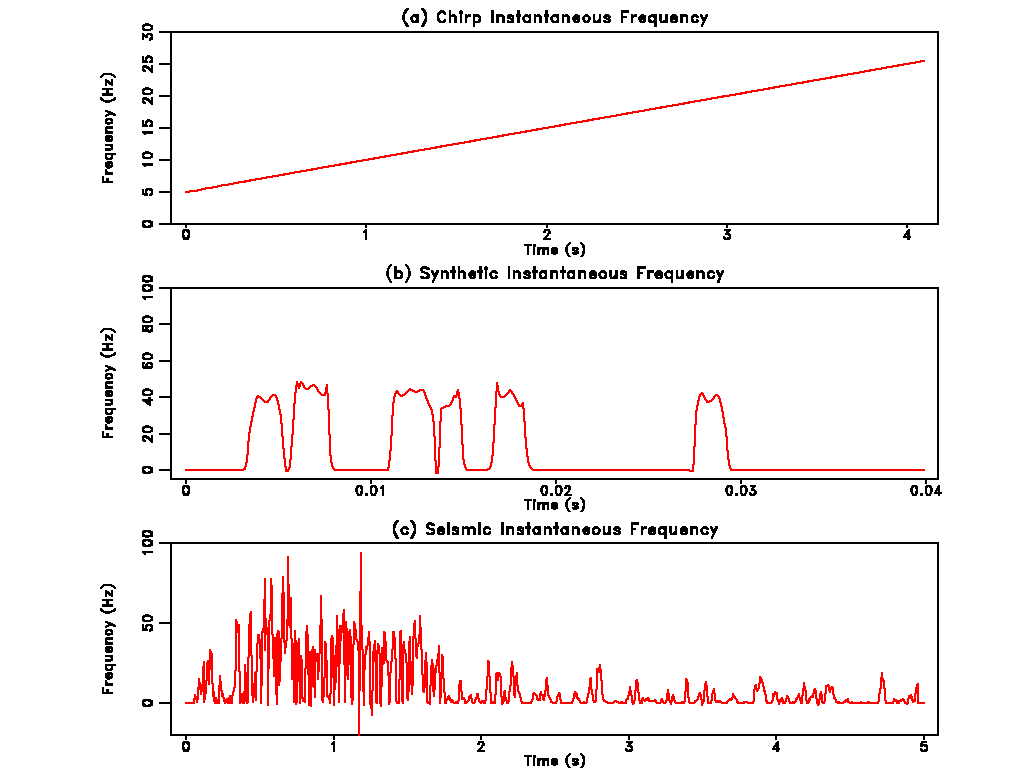

In [12]:
view('inst')

<p id="fig:inst" style="color:navy">Figure 2: Instantaneous frequency of test signals from Figure 1.</p>

Figure <a href="#fig:sign" data-reference-type="ref" data-reference="fig:sign">1</a>
shows three test signals for comparing frequency attributes. The first
signal is a synthetic chirp function with linearly varying frequency.
Instantaneous frequency shown in
Figure <a href="#fig:inst" data-reference-type="ref" data-reference="fig:inst">2</a>
correctly estimates the modeled frequency trend. The second signal is a
piece of a synthetic seismic trace obtained by convolving a 40-Hz Ricker
wavelet with synthetic reflectivity. The instantaneous frequency
(Figure <a href="#fig:inst" data-reference-type="ref" data-reference="fig:inst">2</a>b)
shows many variations and appears to contain detailed information.
However, this information is useless for characterizing the dominant
frequency content of the data, which remains unchanged due to
stationarity of the seismic wavelet. The last test example
(Figure <a href="#fig:sign" data-reference-type="ref" data-reference="fig:sign">1</a>c)
is a real trace extracted from a seismic image. The instantaneous
frequency
(Figure <a href="#fig:inst" data-reference-type="ref" data-reference="fig:inst">2</a>c)
appears noisy and even contains physically unreasonable negative values.
Similar behavior was described by White (1991).

### Definition of local frequency

The definition of the local frequency attribute starts by recognizing
equation <a href="#eq:vecife" data-reference-type="ref" data-reference="eq:vecife">5</a>
as a regularized form of linear inversion. Changing regularization from
simple identity to a more general regularization operator $\mathbf{R}$
provides the definition for local frequency as follows: 
\begin{equation}
\label{eq:reg}
  \mathbf{w}_{loc} = 
  \left(\mathbf{D}+\epsilon\,\mathbf{R}\right)^{-1}\,\mathbf{n}\;,
\end{equation}
The role of the regularization operator is ensuring continuity and
smoothness of the local frequency measure. A different approach to
regularization follows from the shaping method (Fomel, 2006). Shaping regularization operates with a smoothing (shaping) operator $\mathbf{S}$ by incorporating it into the inversion scheme as follows: 
\begin{equation}
\label{eq:shp}
  \mathbf{w}_{loc} = \left[\lambda^2\,\mathbf{I} + 
    \mathbf{S}\,\left(\mathbf{D} - \lambda^2\,\mathbf{I}\right)\right]^{-1}\,
  \mathbf{S}\,\mathbf{n}\;,
\end{equation}
Scaling by $\lambda$ preserves physical
dimensionality and enables fast convergence when inversion is
implemented by an iterative method. A natural choice for $\lambda$ is
the least-squares norm of $\mathbf{D}$.

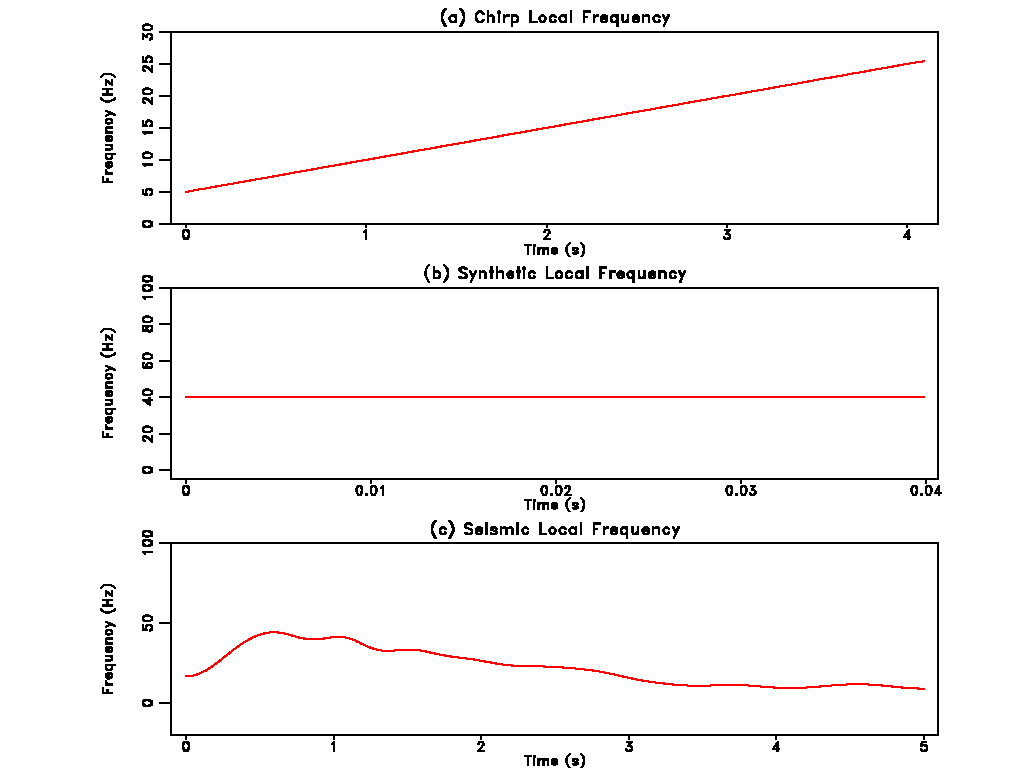

In [14]:
view('locl')

<p id="fig:locl" style="color:navy">Figure 3: Local frequency of test signals from Figure 1.</p>

Figure <a href="#fig:locl" data-reference-type="ref" data-reference="fig:locl">3</a>
shows the results of measuring local frequency in the test signals from
Figure <a href="#fig:sign" data-reference-type="ref" data-reference="fig:sign">1</a>.
I used the shaping regularization
formulation <a href="#eq:shp" data-reference-type="ref" data-reference="eq:shp">7</a>
with the shaping operator $\mathbf{S}$ defined as a triangle smoother.
The chirp signal frequency
(Figure <a href="#fig:locl" data-reference-type="ref" data-reference="fig:locl">3</a>a)
is correctly recovered. The dominant frequency of the synthetic signal
(Figure <a href="#fig:locl" data-reference-type="ref" data-reference="fig:locl">3</a>b)
is correctly estimated to be stationary at 40 Hz. The local frequency of
the real trace
(Figure <a href="#fig:locl" data-reference-type="ref" data-reference="fig:locl">3</a>c)
appears to vary with time according to the general frequency attenuation trend.

In [25]:
%%file vecta.scons

import rsf.recipes.warp as warp
from rsf.recipes.beg import server as private

trace = 300

Flow('line.asc', None,
     'echo %d 0 %d 4 n1=4 data_format=ascii_float in=$TARGET' %
     (trace, trace))
Plot('line', 'line.asc',
     '''
     dd form=native | dd type=complex |
     graph min2=0 max2=4 min1=-0.5 max1=471.5 pad=n wantaxis=n wanttitle=n
     ''')

for mode in ['pp', 'ss']:
    data = 'bend_l1_%cmig_enhanc.sgy' % mode[1]
    Fetch(data, 'vecta', private)
    Flow(mode, data,
         '''
         segyread tape=$SOURCE read=data | window n2=471 | 
         scale axis=2 | put label2=Trace
         ''', stdin=0)
    Result(mode, mode, 'Overlay')
    Result('v'+mode, [mode, 'line'], 'Overlay')

nails = Split('''
0.32 0.72
0.57 1.22
0.97 1.97
''')

Flow('nails0.asc', None,
     'echo %s n1=2 n2=%d in=$TARGET data_format=ascii_float' %
     (' '.join(nails), len(nails)/2))
Flow('nails', 'nails0.asc', 'dd form=native')
Flow('nreal', 'nails', 'window n1=1')
Flow('nimag', 'nails', 'window f1=1')
Plot('nails', 'nreal nimag',
     '''
     cmplx ${SOURCES[:2]} |
     graph min1=0 max1=2 min2=0 max2=4 symbol='o' wanttitle=n
     label1="PP time (s)" label2="SS time (s)" plotcol=5
     symbolsz=15
     ''', stdin=0)

Flow('fit', 'nails pp1', 'linefit pattern=${SOURCES[1]}')
Plot('fit', 'graph min1=0 max1=2 min2=0 max2=4 title="Line Fit" ')
Result('vnails', 'fit nails', 'Overlay')

Flow('fit0', 'fit', 'math output=input-x1 | spray o=0 d=1 n=471')

warp.warp2('vec', 'pp', 'ss', 'fit0',
           nx=471,
           inter=5,
           tmax=1.5,
           ss=1,
           trace=trace,
           gmax=2.3,
           gmin=1.5,
           dt=0.002,
           g0=0.9,
           ng=41,
           rect1=50,
           rect2=50,
           fmax=70,
           fmin=20,
           frect=25,
           frame1=285,
           iter=2,
           clip=0.39)

Overwriting vecta.scons


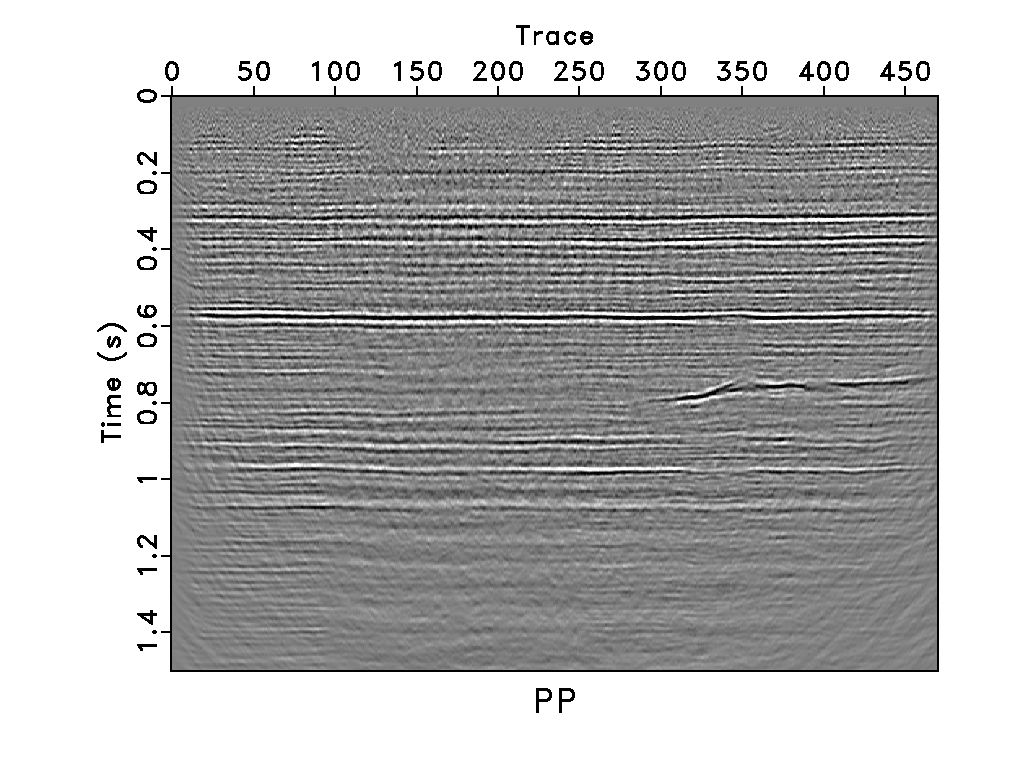

In [19]:
view('pp')

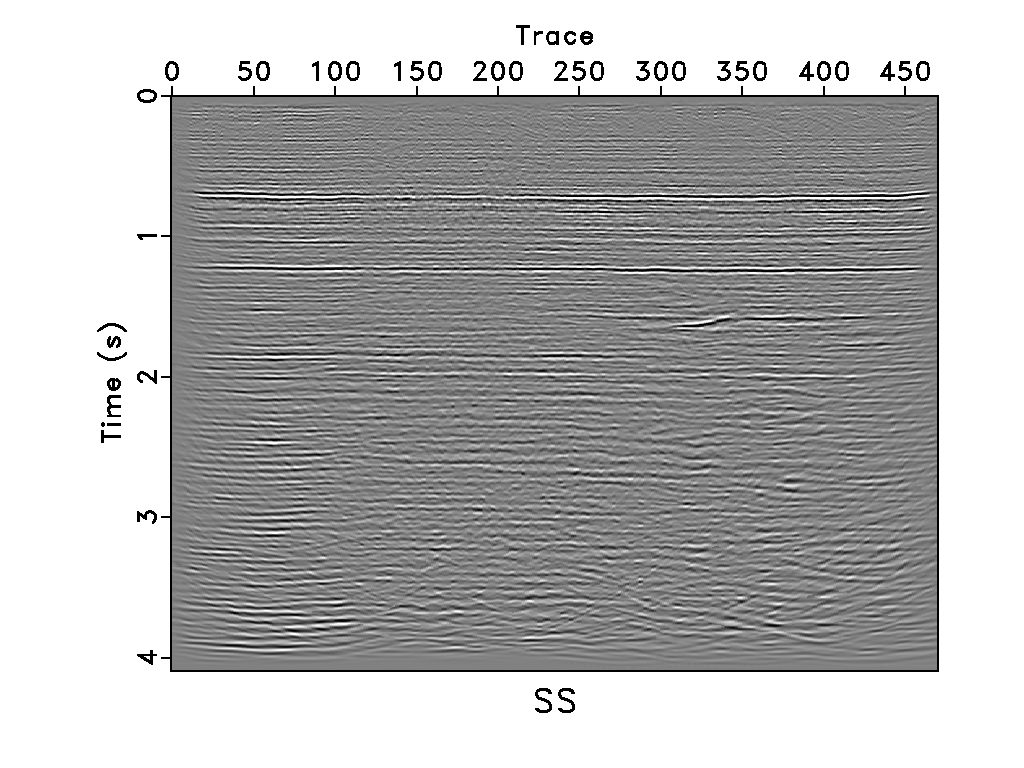

In [20]:
view('ss')

<p id="fig:pp,ss" style="color:navy">Figure 4: PP (a) and SS (b) images from a nine-component land survey.</p>

Figure <a href="#fig:pp,ss" data-reference-type="ref" data-reference="fig:pp,ss">4</a> shows seismic images from compressional (PP) and shear (SS) reflections obtained by processing a land nine-component survey.

In [22]:
%%file ivecta.scons

Result('pi', 'ppi', 'Overlay')
Result('si', 'vec-si-0', 'Overlay')

Writing ivecta.scons


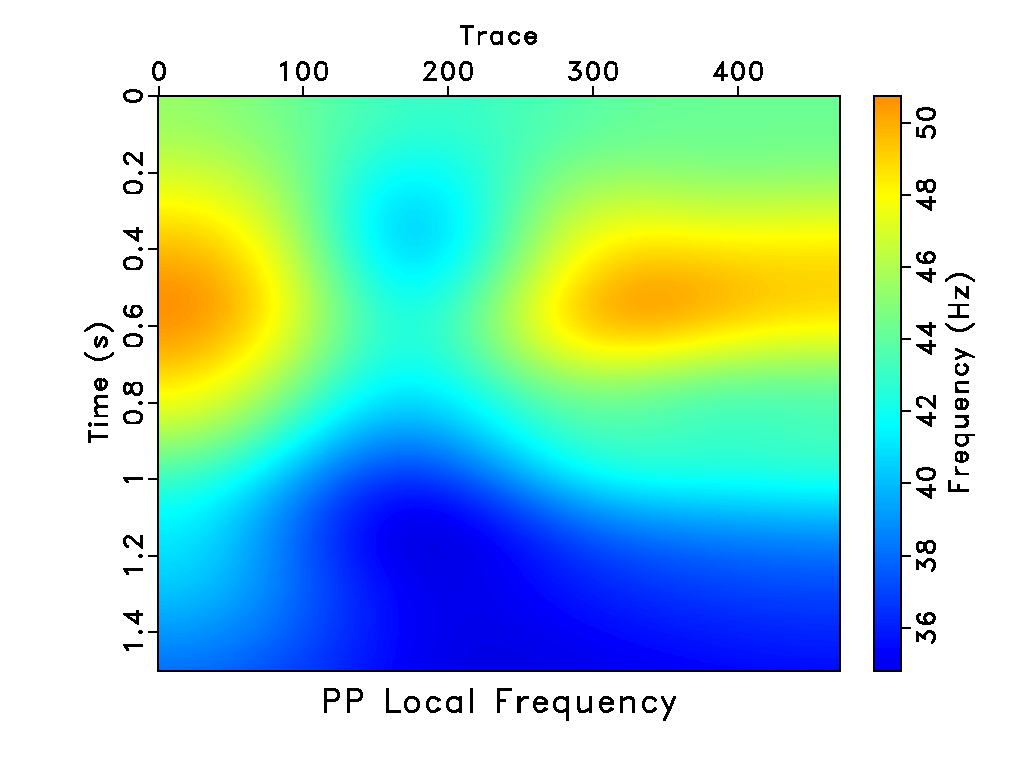

In [23]:
view('pi')

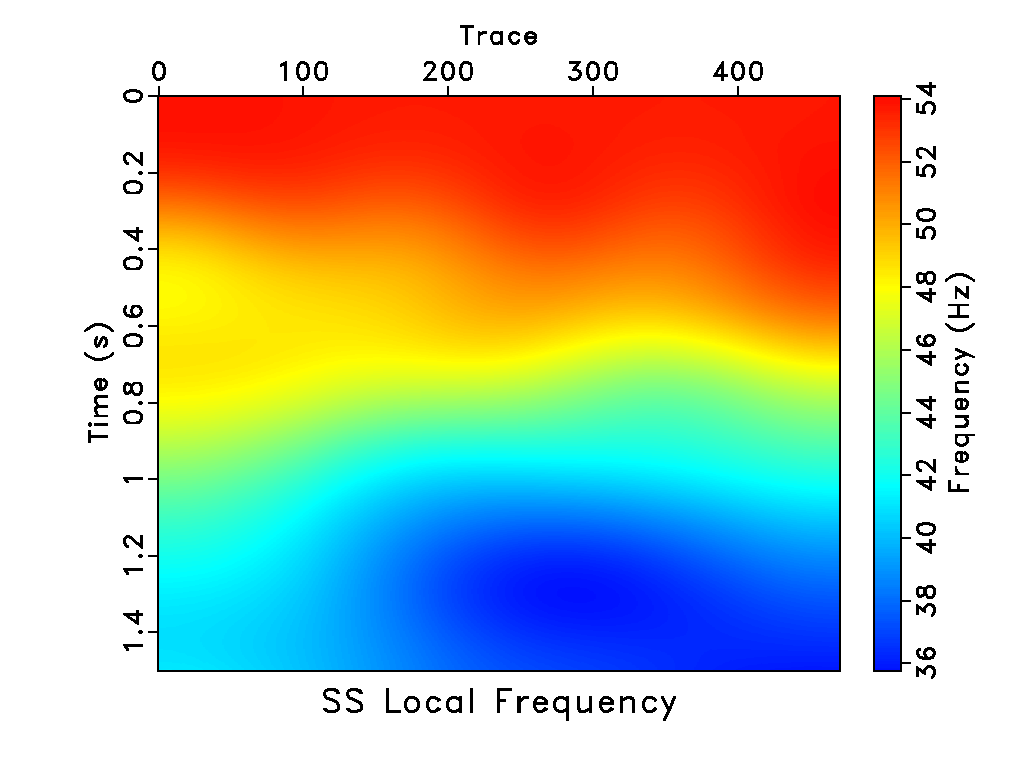

In [26]:
view('si')

<p id="fig:pi,si" style="color:navy">Figure 5: Local frequency attribute of PP (a) and warped SS (b) images.</p>

Figure <a href="#fig:pi,si" data-reference-type="ref" data-reference="fig:pi,si">5</a> shows local frequencies measured in PP and SS images after warping the SS image into PP time. The term “image warping” comes from medical imaging (Wolberg, 1990) and refers, in this case, to squeezing the SS image to PP reflection time to make the two images display in the same coordinate system. We can observe a general decay of frequency with time caused by seismic attenuation. After mapping (squeezing) to PP time, the SS image frequency appears higher in the shallow part of the image because of a relatively low S-wave velocity but lower in the deeper part of the image because of the apparently stronger attenuation of shear waves. A low-frequency anomaly in the PP image might be indicative of gas presence. Identifying and balancing non-stationary frequency variations of multicomponent images is an essential part of the multistep image registration technique (Fomel and Backus, 2003; Fomel et al., 2005).

## Measuring local similarity

Consider the task of measuring similarity between two different signals $a(t)$ and $b(t)$.
One can define similarity as a global correlation coefficient and then,
perhaps, measure it in sliding windows across the signal. The local
construction from the previous section suggests approaching this problem
in a more elegant way.

### Definition of global correlation

Global correlation coefficient between $a(t)$ and $b(t)$ can be defined
as the functional 
\begin{equation}
\label{eq:glocor}
  \gamma = \frac{<a(t),b(t)>}{\sqrt{<a(t),a(t)>\,<b(t),b(t)>}}\;,
\end{equation}
where $<x(t),y(t)>$ denotes the dot product between two signals:
\begin{equation}
<x(t),y(t)> = \int x(t)\,y(t)\,d t\;.
\end{equation}
According to
definition <a href="#eq:glocor" data-reference-type="ref" data-reference="eq:glocor">8</a>,
the correlation coefficient of two identical signals is equal to one,
and the correlation of two signals with opposite polarity is minus one.
In all the other cases, the correlation will be less then one in
magnitude thanks to the Cauchy-Schwartz inequality.

The global
measure <a href="#eq:glocor" data-reference-type="ref" data-reference="eq:glocor">8</a>
is inconvenient because it supplies only one number for the whole
signal. The goal of local analysis is to turn the functional into an
operator and to produce local correlation as a variable function
$\gamma(t)$ that identifies local changes in the signal similarity.

### Definition of local correlation

In a linear algebra notation, the squared correlation coefficient
$\gamma$ from
equation <a href="#eq:glocor" data-reference-type="ref" data-reference="eq:glocor">8</a>
can be represented as a product of two least-squares inverses
\begin{equation}
\label{eq:g}
\begin{array}{rcl}
  \gamma^2 & = & \gamma_1\,\gamma_2\;, \\
  \gamma_1 & = & \left(\mathbf{a}^T\,\mathbf{a}\right)^{-1}\,\left(\mathbf{a}^T\,\mathbf{b}\right)\;, \\
  \gamma_2 & = & \left(\mathbf{b}^T\,\mathbf{b}\right)^{-1}\,\left(\mathbf{b}^T\,\mathbf{a}\right)\;, \end{array}
\end{equation}
where $\mathbf{a}$ is a vector notation for $a(t)$, $\mathbf{b}$ is a
vector notation for $b(t)$, and $\mathbf{x}^T\,\mathbf{y}$ denotes the
dot product operation. Let $\mathbf{A}$ be a diagonal operator composed
from the elements of $\mathbf{a}$ and $\mathbf{B}$ be a diagonal
operator composed from the elements of $\mathbf{b}$. Localizing
equations <a href="#eq:g" data-reference-type="ref" data-reference="eq:g">10</a>
amounts to adding regularization to inversion. Scalars $\gamma_1$ and
$\gamma_2$ turn into vectors $\mathbf{c}_1$ and $\mathbf{c}_2$ defined,
using shaping regularization , 
\begin{equation}
  \label{eq:c1s}
\begin{array}{rcl}
  \mathbf{c}_1 & = & 
  \left[\lambda^2\,\mathbf{I} + 
    \mathbf{S}\,\left(\mathbf{A}^T\,\mathbf{A} - \lambda^2\,\mathbf{I}\right)\right]^{-1}\,
  \mathbf{S}\,\mathbf{A}^T\,\mathbf{b}\;, \\
  \mathbf{c}_2 & = & 
    \left[\lambda^2\,\mathbf{I} + 
      \mathbf{S}\,\left(\mathbf{B}^T\,\mathbf{B} - \lambda^2\,\mathbf{I}\right)\right]^{-1}\,
    \mathbf{S}\,\mathbf{B}^T\,\mathbf{a}\;.\end{array}
\end{equation}    
To define a
local similarity measure, I apply the component-wise product of vectors
$\mathbf{c}_1$ and $\mathbf{c}_2$. It is interesting to note that, if
one applies an iterative conjugate-gradient inversion for computing the
inverse operators in
equations <a href="#eq:c1s" data-reference-type="ref" data-reference="eq:c1s">11</a>,
the output of the first iteration will be the smoothed product of the
two signals
$\mathbf{c}_1 = \mathbf{c}_2 = \mathbf{S}\,\mathbf{A}^T\,\mathbf{b}$,
which is equivalent, with an appropriate choice of $\mathbf{S}$, to the
algorithm of fast local cross-correlation proposed by Hale (2006).

The local similarity attribute is useful for solving the problem of
multicomponent image registration. After an initial registration using
interpreter’s “nails” (DeAngelo et al., 2004) or velocities from seismic processing, a useful registration indicator is obtained by squeezing and stretching the warped shear-wave image while measuring its local similarity to the compressional image. Such a technique was named *residual $\gamma$ scan* and proposed by Fomel et al. (2005).

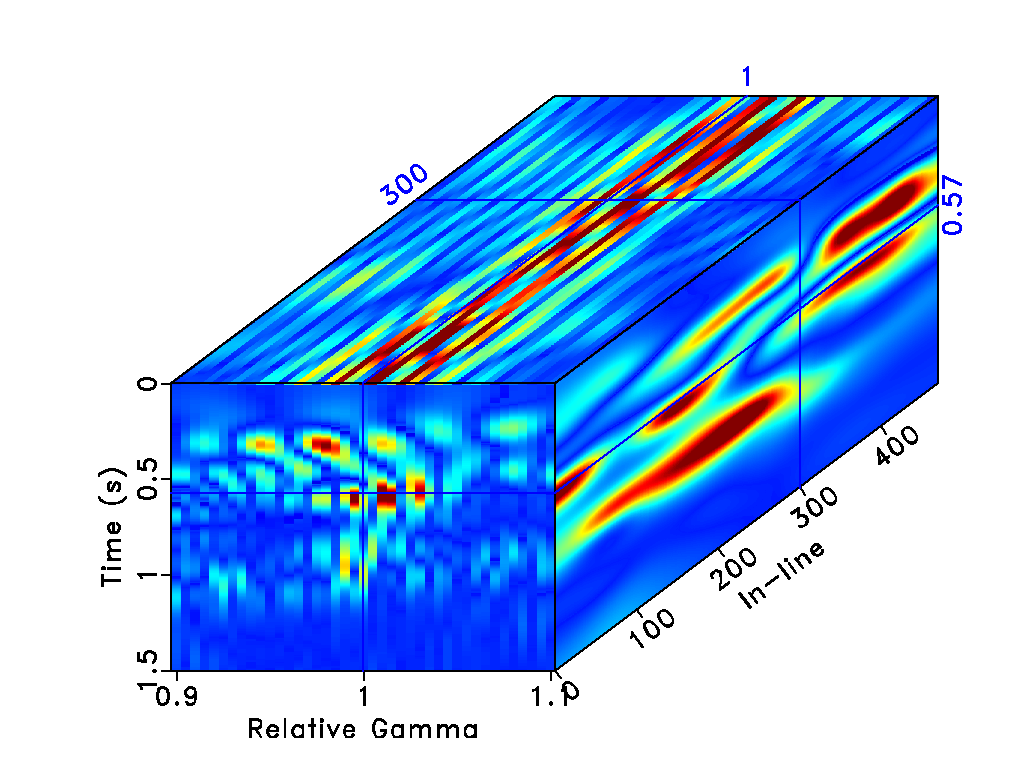

In [27]:
view('vec-sc-0')

<p id="fig:vec-sc-0" style="color:navy">Figure 6: Residual warping scan for multicomponent PP/SS registration computed with the help of the local similarity attribute. Picking maximum similarity trends enables multicomponent registration.</p>

Figure <a href="#fig:vec-sc-0" data-reference-type="ref" data-reference="fig:vec-sc-0">6</a>
shows a residual scan for registration of multicomponent images from
Figure <a href="#fig:pp,ss" data-reference-type="ref" data-reference="fig:pp,ss">4</a>.

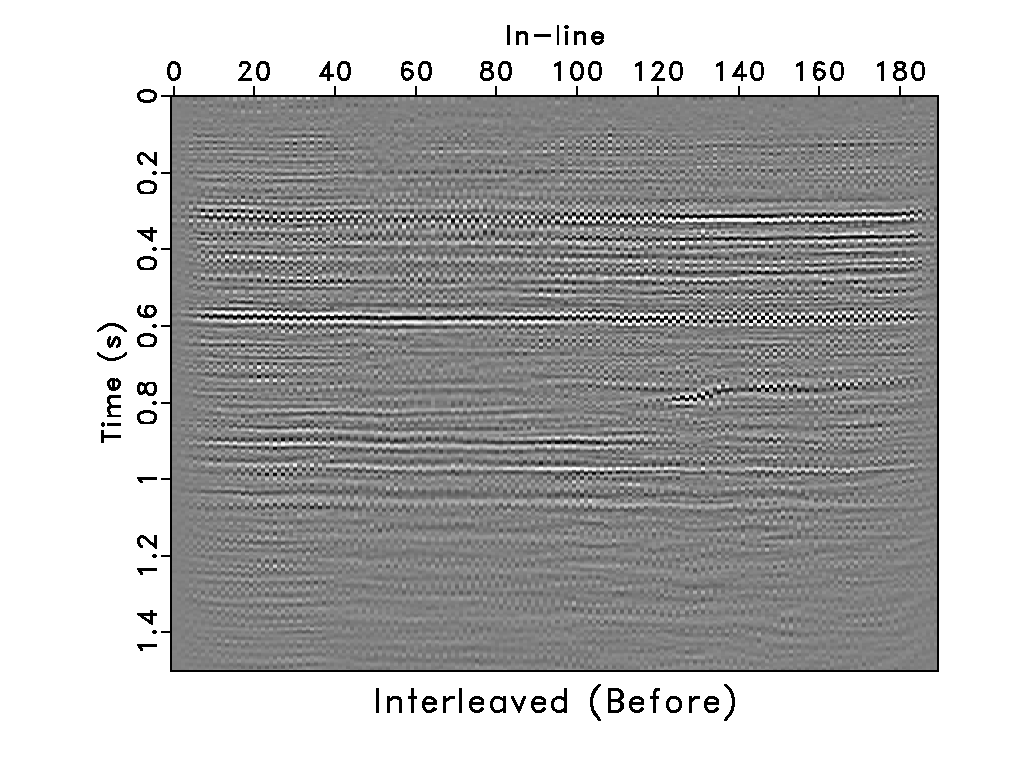

In [28]:
view('vec-in0-0')

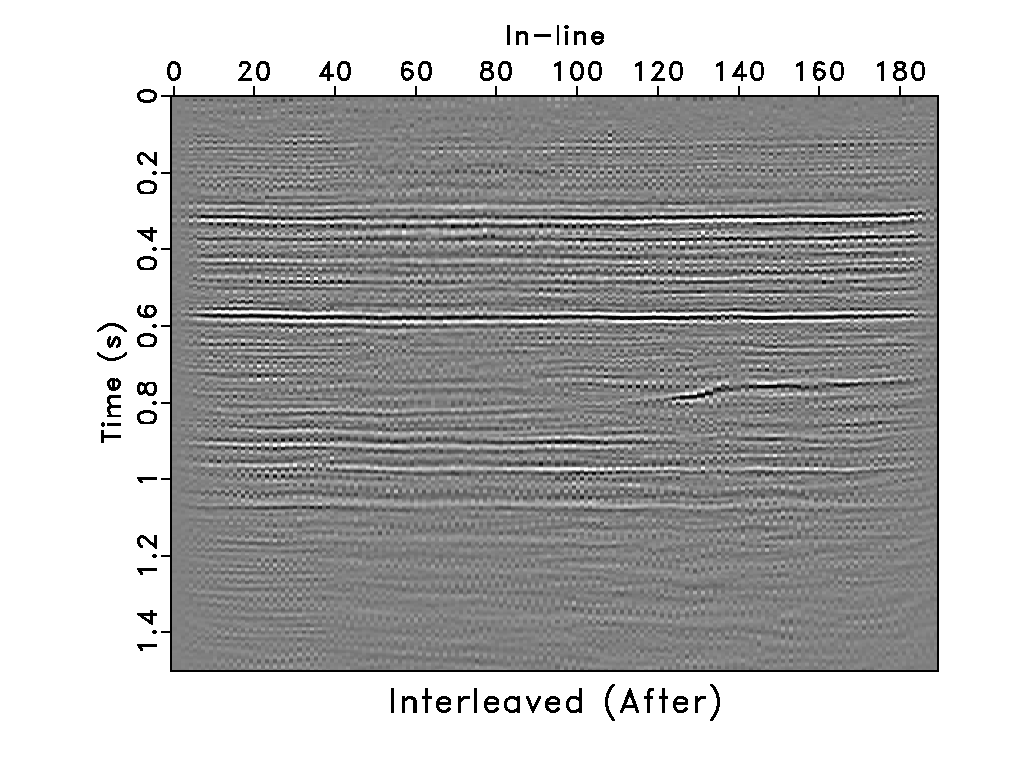

In [29]:
view('vec-in1-1')

<p id="fig:vec-in0-0,vec-in1-1" style="color:navy">Figure 7: Interleaved traces from PP and warped SS images before (a) and after (b) multicomponent registration. The checkerboard pattern on major seismic events in (a) disappears in (b) which is an indication of successful registration.</p>

Identifying and picking points of high local similarity enables
multicomponent registration with high-resolution accuracy. The
registration result is visualized in
Figure <a href="#fig:vec-in0-0,vec-in1-1" data-reference-type="ref" data-reference="fig:vec-in0-0,vec-in1-1">7</a>,
which shows interleaved traces from PP and SS images before and after
registration. The alignment of main seismic events is an indication of
successful registration.

## Conclusions

I have introduced a concept of local seismic attributes and specified it
for such attributes as local frequency and local similarity. Local
attributes measure signal characteristics not instantaneously at each
signal point and not globally across a data window but locally in the
neighborhood of each point. They find applications in different steps of
multicomponent seismic image registration. One can extend the idea of
local attributes to other applications.

## Acknowledgments

I would like to thank Bob Hardage, Milo Backus, and Bob Graebner for
introducing me to the problem of multicomponent data registration and
for many useful discussions. The data example was kindly provided by
Vecta. This work was partially supported by the U.S. Department of
Energy through Program DE-PS26-04NT42072 and is authorized for
publication by the Director, Bureau of Economic Geology, The University
of Texas at Austin.

## References

Barnes, A. E., 1992, The calculation of instantaneous frequency and
instantaneous bandwidth (short note): Geophysics, **57**, 1520–1524.

——–, 1993, Instantaneous spectral bandwidth and dominant frequency with
applications to seismic reflection data: Geophysics, **58**, 419–428.

Brown, A. R., 1996, Interpreter’s corner - Seismic attributes and their
classification: The Leading Edge, **15**, 1090.

Chen, Q., and S. Sidney, 1997, Seismic attribute technology for
reservoir forecasting and monitoring: The Leading Edge, **16**, 445–456.

Chopra, S., and K. J. Marfurt, 2005, Seismic attributes – A historical
perspective: Geophysics, **70**, 3SO–28SO.

DeAngelo, M. V., R. Remington, P. Murray, B. A. Hardage, R. Graebner,
and K. Fouad, 2004, Multicomponent seismic technology for imaging deep
gas prospects: The Leading Edge, **23**, 1270–1281.

Eastwood, J., 2002, The attribute explosion: The Leading Edge, **21**,
994.

Fomel, S., 2006, Shaping regularization in geophysical estimation
problems: Geophysics, accepted for publication.

Fomel, S., and M. Backus, 2003, Multicomponent seismic data registration
by least squares: 73rd Ann. Internat. Mtg., Soc. of Expl. Geophys.,
781–784.

Fomel, S., M. Backus, K. Fouad, B. Hardage, and G. Winters, 2005, A
multistep approach to multicomponent seismic image registration with
application to a West Texas carbonate reservoir study: 75th Ann.
Internat. Mtg, Soc. of Expl. Geophys., 1018–1021.

Hale, D., 2006, Fast local cross-correlations of images: 76th Ann.
Internat. Mtg, Soc. of Expl. Geophys., 3160–3163.

Matheney, M. P., and R. L. Nowack, 1995, Seismic attenuation values
obtained from instantaneous frequency matching and spectral ratios:
Geohysical Journal International, **123**, 1–15.

Sheriff, R. E., 1991, Encyclopedic Dictionary of Exploration Geophysics:
Soc. of Expl. Geophys. (How it was done? - see TLE-10-4-41-42).

Taner, M. T., F. Koehler, and R. E. Sheriff, 1979, Complex seismic trace
analysis: Geophysics, **44**, 1041–1063. (Errata in GEO-44-11-1896;
Discussion in GEO-45-12-1877-1878; Reply in GEO-45-12-1878-1878).

White, R. E., 1991, Properties of instantaneous seismic attributes: The
Leading Edge, **10**, 26–32. (Discussion and reply in TLE-11-8-45-46 and
TLE-11-10-10-12).

Wolberg, G., 1990, Digital image warping: IEEE Computer Society.